NDVI range: -0.19268027 to 0.8178162


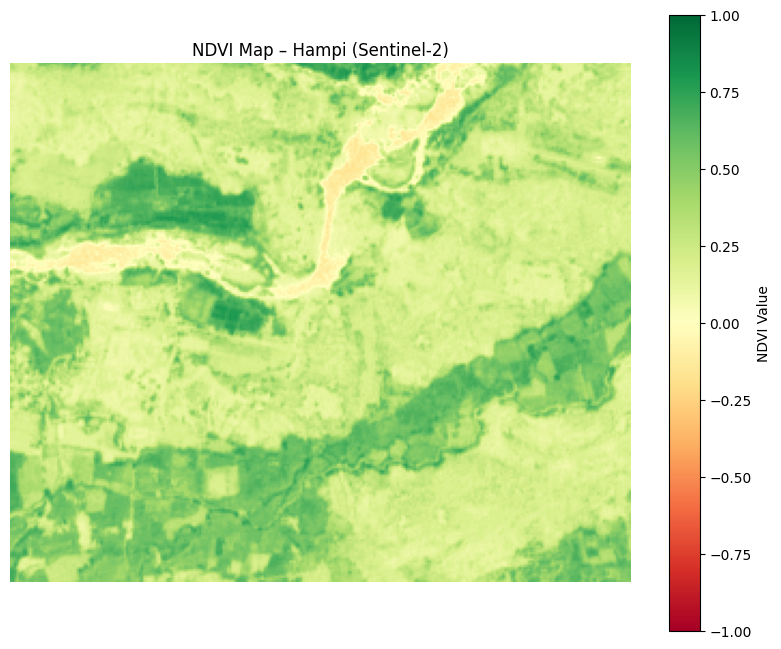

In [2]:
# NDVI Visualization
# ------------------

import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load NDVI GeoTIFF
ndvi_path = '../results/ndvi_hampi.tiff'

with rasterio.open(ndvi_path) as src:
    ndvi = src.read(1)
    ndvi_meta = src.meta

# Check stats
print("NDVI range:", np.nanmin(ndvi), "to", np.nanmax(ndvi))

# Plot NDVI 
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI Value')
plt.title('NDVI Map – Hampi (Sentinel-2)')
plt.axis('off')

# Save output 
plt.savefig('../results/ndvi_hampi.png', dpi=300, bbox_inches='tight')
plt.show()


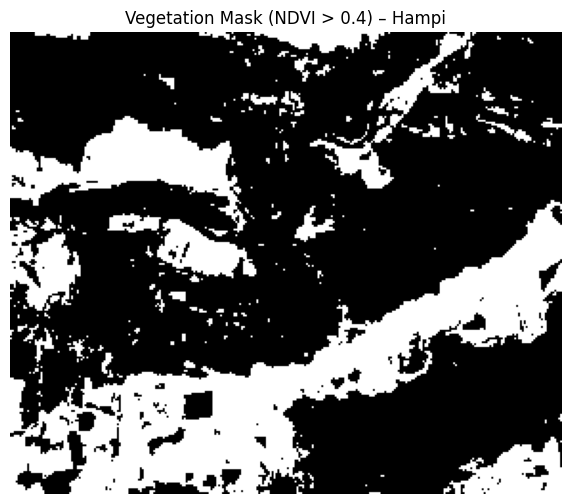

In [3]:
# Generate vegetation mask (NDVI > 0.4)

# Set threshold
threshold = 0.4

# Create binary mask: 1 where NDVI > 0.4, 0 elsewhere
veg_mask = np.where(ndvi > threshold, 1, 0).astype('uint8')

# Plot the vegetation mask
plt.figure(figsize=(8, 6))
plt.imshow(veg_mask, cmap='gray')
plt.title(f'Vegetation Mask (NDVI > {threshold}) – Hampi')
plt.axis('off')
plt.savefig('../results/vegetation_mask.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
# Save vegetation mask as GeoTIFF
mask_output_path = '../results/vegetation_mask.tiff'

with rasterio.open(mask_output_path, 'w', 
                   driver='GTiff',
                   height=veg_mask.shape[0],
                   width=veg_mask.shape[1],
                   count=1,
                   dtype='uint8',
                   crs=ndvi_meta['crs'],
                   transform=ndvi_meta['transform']) as dst:
    dst.write(veg_mask, 1)

print(f"Vegetation mask saved to: {mask_output_path}")


Vegetation mask saved to: ../results/vegetation_mask.tiff
